<a href="https://colab.research.google.com/github/samriddh202/IIIT_Internship_Code/blob/main/Neural_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Dataset with Neural NET

Imprting the libraries for smooth running of the data.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Looking at the data

In [ ]:
#X_train
#X_test
#y_train
#y_test

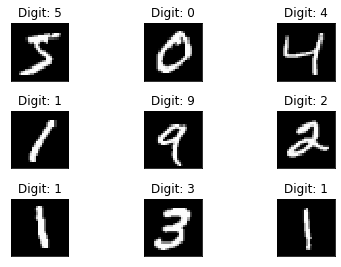

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])


Checking the Dimensions of the training and testing data

In [ ]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
#print("X_test shape", X_test.shape) will have similiar dimension but have less data in the test.
#print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)


# Reshaping and Normalizing the data

In [ ]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


Doing a hot-plate encoding so that we could see which number it is

In [ ]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


Making the Nural Net

In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(784,))) ## First hidden layer
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))      ## Second hidden layer
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(512))      ## Third hidden layer
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))      ## Output layer
model.add(Activation('softmax'))



```
# This is formatted as code
```

Compiling and training the data

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(X_train, Y_train,
          batch_size=100, epochs=50,
          verbose=2,
          validation_data=(X_test, Y_test))



Epoch 1/50
600/600 - 10s - loss: 0.2467 - accuracy: 0.9247 - val_loss: 0.1044 - val_accuracy: 0.9647
Epoch 2/50
600/600 - 10s - loss: 0.1092 - accuracy: 0.9673 - val_loss: 0.0778 - val_accuracy: 0.9755
Epoch 3/50
600/600 - 10s - loss: 0.0832 - accuracy: 0.9743 - val_loss: 0.0731 - val_accuracy: 0.9780
Epoch 4/50
600/600 - 10s - loss: 0.0671 - accuracy: 0.9794 - val_loss: 0.0751 - val_accuracy: 0.9776
Epoch 5/50


Accuracy and Loss graph

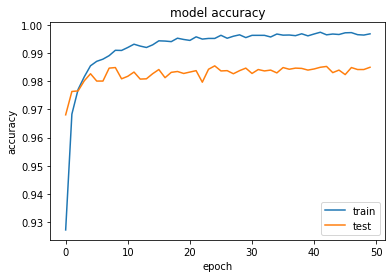

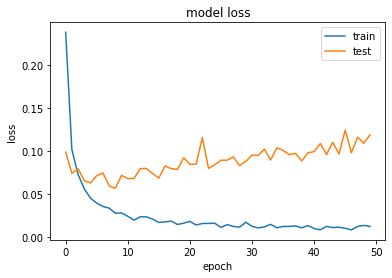

In [ ]:


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()


In [ ]:
loss_and_metrics = model.evaluate(X_test, Y_test, verbose=2)
print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.1189 - accuracy: 0.9850
Test Loss 0.1189262792468071
Test Accuracy 0.9850000143051147


The accuracy we are getting is good which is close to 98.6% but we are also getting a high loss function which could be result of the problem in the neural net. With a little bit of experimenting with the epochs and batch size we might be able to less it.

Predictions Matrix

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).

9850  classified correctly
150  classified incorrectly


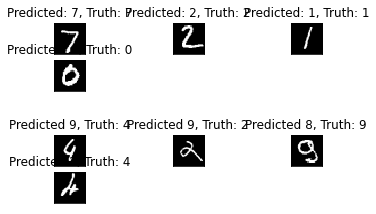

In [ ]:
predicted_classes = model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")


for i, correct in enumerate(correct_indices[:4]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

for i, incorrect in enumerate(incorrect_indices[:4]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])
